## The Complete LangChain Ecosystem

LangChain is a framework that simplifies the process of building applications using Large Language Models (LLMs). It provides a set of modular building blocks that developers can use to design, integrate and deploy intelligent systems.
The architecture of LangChain is structured in a way that separates the core logic, integration layers and advanced deployment tools. This layered approach makes LangChain both flexible for experimentation and robust for production use.

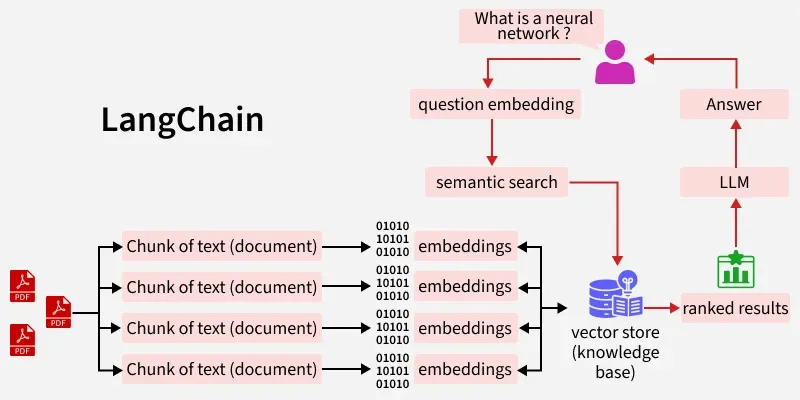

## Core Architecture of LangChain
Let’s see how LangChain is structured from its core modules to advanced tools:

1. **LangChain Core (langchain-core)**<br>
Think of this as the engine of a car.
    - It provides basic components: prompts, messages, models, chains, memory, and output parsers.
    - It doesn’t care about which car body or paint you use — it’s just the engine.
    - **Role:** Foundation for everything in LangChain; lightweight and independent of external tools.
    <br><br>


2. **Main LangChain Package (langchain)**<br>
If langchain-core is the engine, this is the chassis + controls.
    - Adds higher-level workflows, orchestration of chains and agents.
    - Still model-agnostic, meaning you can plug in OpenAI, GPT-5 Nano, or any other provider.
    - **Role:** Lets you build complex applications without worrying about low-level plumbing.
    <br><br>


3. **Integration Packages**
These are like adapters for external gadgets in your car.
    - Examples:
        - langchain-openai → connects to OpenAI’s GPT models.
        - langchain-pinecone → connects to Pinecone vector database.
    - Keeps main LangChain minimal while allowing modular extensions.
    - **Role:** Bridge between LangChain and external systems.
    <br><br>


4. **LangChain Community (langchain-community)**
Imagine a garage of community-made upgrades.
    - Community-maintained connectors for services not officially covered.
    - Expands the ecosystem rapidly and lets you use niche tools.
    - **Role:** Expands LangChain’s reach and flexibility.
    <br><br>


5. **LangGraph**
Now we move from car analogies to city maps for AI workflows.
    - Think of it as a graph of computational nodes: each node does a task, edges define data flow.
    - Supports:
        - Stateful memory
        - Streaming outputs
        - Multi-step decision-making
    - **Use case:** Advanced agents, retrieval pipelines, multi-step reasoning.
    <br><br>


6. **LangServe**
    - Like turning your car into a ride-sharing service.
    - Exposes your chains or agents as APIs.
    - Makes it easy to serve models to web apps, mobile apps, or other systems.
    - **Use case:** Deploying prototypes into production services.
    <br><br>


7. **LangSmith**
    - Think of it as the dashboard and telemetry system for your car.
    - Tracks:
        - Prompt executions
        - Inputs/outputs
        - Errors and performance metrics
    - **Use case:** Debugging, testing, and monitoring LangChain applications at scale.

## LangChain Setup
LangChain is modular, meaning you only use the components you need. To get started, you first need the proper libraries and setup.

1. **Install Required Packages**

    These packages enable you to work with LLMs, vector stores, and other tools:
    ```bash
    pip install langchain langchain-openai openai
    pip install langchain-community faiss-cpu
    ```

    Purpose of each:
    - **langchain:** Core framework for building LLM-powered applications.
    - **langchain-openai:** Integration with OpenAI models like GPT-4 or GPT-5 Nano.
    - **openai:** Official OpenAI Python library to authenticate and call the API.
    - **langchain-community:** Community connectors for tools, vector stores, retrievers, etc.
    - **faiss-cpu:** Vector database (CPU-based) for fast semantic search.

2. **Import Libraries**
    We need some Python libraries to access environment variables:
    ```python
    import os
    ```
    os allows us to set environment variables like the OpenAI API key.

3. **Set Your OpenAI API Key**
    ```python
    os.environ["OPENAI_API_KEY"] = "your_api_key"
    ```
    Replace "your_api_key" with your actual API key from OpenAI’s dashboard.<br>
    This lets LangChain communicate with OpenAI’s LLMs.<br>
    **Security tip:** Don’t share your API key publicly. Consider using .env files for safety.

In [ ]:
# import os
# os.environ["OPENAI_API_KEY"] ="sk-proj-gawDQPirgIk8Ldfl1MyuadVv3IbbsMykln_jw9up_7oSoCQEez1ERw3QETRCbRBKENNf6GXsk73BlbkFJBU6bgaVe7INcecjc2AQu509QHVv7ph-QuIoipL0-wXd2KWGugfsuVPj3MNvMcZH8GY4oM1IpcA"


1. Create a .env File
    - In your project folder, create a new file called .env.
    - Add your environment variables in the format:
    ```ini
    OPENAI_API_KEY=your_actual_api_key_here
    ANOTHER_VARIABLE=value
    ```
    Example:
    ```ini
    OPENAI_API_KEY=sk-1234567890abcdef
    ```
    - No quotes needed around the value.
    - Each variable should be on a new line.
    - Keep the file in your project root.
2. Install python-dotenv (Optional but Recommended)<br>
    This library makes it easy to load .env variables into your Python scripts.
    ```bash
    pip install python-dotenv
    ```
3. Load the .env File in Python using below code.

In [54]:
# Using .env file to store API key for security
import os
from dotenv import load_dotenv

# Load variables from .env
load_dotenv()

# Access your API key
api_key = os.getenv("OPENAI_API_KEY")


## Langchain Key Components 

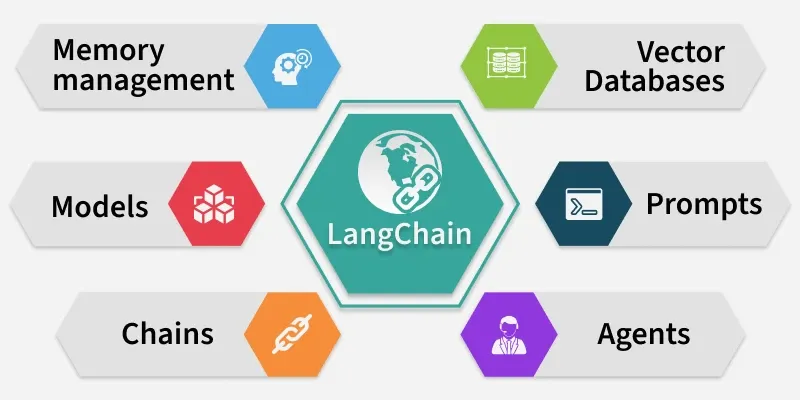

### 1. Prompt

1. What is a Prompt in LangChain?<br>
A prompt is basically instructions you give to the LLM so it knows what to do.<br>
Instead of writing the full instructions every time, LangChain lets you create reusable templates:
    - PromptTemplate → for simple single-text prompts
    - ChatPromptTemplate → for chat-style prompts with multiple message roles: system, human, and optionally assistant

2. How ChatPromptTemplate Works
    - {text} → Placeholder for dynamic user input.
    - format_messages() → Fills in the placeholder with actual values.
    - llm.invoke() → Sends the prompt to the model and gets the response.

3. Example Code

In [ ]:
from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate

llm = ChatOpenAI(model="gpt-5-nano")

prompt = ChatPromptTemplate.from_template("State the parts of speech in this sentence: {text}") # used for Singular prompts

final_prompt = prompt.format_messages(text="Hi!! my name is Geek.")
response = llm.invoke(final_prompt)
print(response.content)

### 2. Chain

1. What is a Chain?<br>
A chain is essentially a pipeline or workflow that connects multiple components together, usually prompts and LLMs, but it can also include tools, retrievers, or other logic.<br>
Think of it like a factory conveyor belt:
    - Raw material (input text) goes in.
    - Each station (component) processes it (summarize, translate, classify, etc.).
    - Finished product (output) comes out at the end.<br>
    
    Chains are useful because many LLM applications aren’t just one-shot tasks—they’re multi-step workflows.

2. How Chain Works
    - PromptTemplate → defines how input should be structured.
        - {text} is a dynamic field for user input.
    - ChatOpenAI(model="gpt-5-nano") → initializes the LLM.
    - chain = prompt | llm → combines the prompt and model into a single workflow.
        - You can add more steps in a chain if needed.
    - chain.invoke({"text": text}) → executes the workflow and returns the model output.

3. Example Code

In [47]:
from langchain.prompts import PromptTemplate
from langchain_openai import ChatOpenAI

# 1. Define the template
template = "Summarize the following text in one line:\n\n{text}"
prompt = PromptTemplate(template=template, input_variables=["text"]) #for plain text prompts (no roles, just text).

# 2. Initialize the model
llm = ChatOpenAI(model="gpt-5-nano", temperature=0)

# 3. Create a Runnable sequence (prompt → llm)
chain = prompt | llm

# 4. Run with invoke
text = "LangChain is a framework designed to simplify the process of building applications powered by LLMs."
response = chain.invoke({"text": text})

print(response.content)

LangChain is a framework that simplifies building LLM-powered applications.


### 3. Memory

1. Why Memory?<br>
Most LLMs are stateless:
    - They don’t remember past messages.
    - Each query is independent.<br>
    
    If you want your LLM to behave like a context-aware assistant (remembering user info, prior messages, or ongoing conversation context), you need Memory.<br>
    <br>
    Think of it as a notepad for the LLM:
    - LLM writes key info into the notepad after every message.
    - Later, it reads the notepad to provide contextually relevant responses.

2. Core Components
    - ConversationBufferMemory
        - Stores dialogue history in memory.
        - Example: user said “my name is Geek” → model remembers for future queries.
    - ConversationChain
        - Combines LLM + Memory.
        - Automatically uses stored memory when generating responses.

3. Example Code

In [48]:
from langchain_openai import ChatOpenAI
from langchain.memory import ConversationBufferMemory
from langchain.prompts import ChatPromptTemplate, MessagesPlaceholder

# Step 1: create memory
memory = ConversationBufferMemory(return_messages=True)

# Step 2: create a prompt that uses memory
prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful chatbot."),
    MessagesPlaceholder(variable_name="history"),
    ("human", "{input}")
]) #multiple message roles (system, human, AI, memory placeholders).

# Step 3: create the LLM
llm = ChatOpenAI(model="gpt-5-nano", temperature=0)

# Step 4: function to chat
def chat(user_input):
    # Load memory history
    history = memory.load_memory_variables({})["history"]
    # Format prompt
    messages = prompt.format_messages(history=history, input=user_input)
    # Get LLM response
    response = llm.invoke(messages)
    # Save turn into memory
    memory.save_context({"input": user_input}, {"output": response.content})
    return response.content

# Try chatting
print(chat("Hello, my name is Khan."))
print(chat("Can you remind me what my name is?"))


Hi Khan! Nice to meet you. How can I help you today?  
I can explain concepts, help with writing or editing, assist with coding, brainstorm ideas, plan tasks, translate, or just chat. Tell me what you’re working on or what you’d like to do.
Your name is Khan. If you’d like, I can remember it for this chat and use it going forward.


## 4. Retriever and Vector Stores
1. Why We Need Them<br>
    - LLMs (like GPT-5) have a knowledge cutoff — they don’t know new or private data.
    - To fix this, we use Retrievers and Vector Stores.
    - They help us extend the model’s knowledge by connecting it to external documents (PDFs, text, etc.).

2. How It Works
    - Text Embedding
        - Each chunk of text is converted into a high-dimensional vector using embeddings.
    - Vector Store (FAISS, Pinecone, Chroma, etc.)
        - These vectors are stored and indexed for fast similarity search.
    - Retriever
        - When a user asks a question, it converts the query into a vector → finds the most similar stored chunks → sends them to the LLM as context.

3. Key Concepts Recap

    | Component              | Purpose                                                          |
    | ---------------------- | ---------------------------------------------------------------- |
    | **OpenAIEmbeddings**   | Converts text → numerical vector                                 |
    | **FAISS Vector Store** | Stores and searches those vectors                                |
    | **Retriever**          | Finds relevant chunks based on similarity                        |
    | **RAG**                | Uses retriever + LLM to generate answers with external knowledge |

    <br>
4. Example Code

In [49]:
from langchain_openai import OpenAIEmbeddings
from langchain_community.vectorstores import FAISS

# 1️⃣ Embeddings
embeddings = OpenAIEmbeddings()

# 2️⃣ Knowledge base
docs = [
    "LangChain is a powerful LLM framework.",
    "It allows integration with external data and APIs.",
    "LangServe is used for deployment."
]

# 3️⃣ Create FAISS vector store
vectorstore = FAISS.from_texts(docs, embeddings)

# 4️⃣ Make retriever
retriever = vectorstore.as_retriever()

# 5️⃣ Query using the modern API
query = "What is LangChain used for?"
results = retriever.invoke(query)

# 6️⃣ Print retrieved documents
for r in results:
    print("Retrieved:", r.page_content)


Retrieved: LangChain is a powerful LLM framework.
Retrieved: LangServe is used for deployment.
Retrieved: It allows integration with external data and APIs.


## 5. Agents

1. What Are Agents?<br>
Agents make your LLM think and act dynamically — instead of just responding, they can:
    - Decide what tool to use.
    - Call that tool (like a calculator, search API, database).
    - Combine results intelligently before answering.

    Think of an agent as a “smart decision-maker” sitting between the LLM and the tools.

2. How It Works

    | Step | Component                            | Role                              |
    | ---- | ------------------------------------ | --------------------------------- |
    | **1**  | **ChatOpenAI (GPT-5-nano)**          | Brain that reasons                |
    | **2**  | **load_tools(["llm-math"])**         | Gives agent calculation ability   |
    | **3**  | **create_react_agent()**             | Builds the ReAct reasoning loop   |
    | **4**  | **invoke()**                         | Runs the reasoning + action chain |
    | **5**  | **response["messages"][-1].content** | Returns final text answer         |

    <br>
3. Example Scenario<br>
Let’s build a simple agent that:
    - Uses the llm-math tool to solve arithmetic problems.
    - Uses GPT-5-nano as its reasoning brain.
    - Decides automatically whether to calculate or just answer.

4. Modern Example (using LangGraph)

In [50]:
from langchain_openai import ChatOpenAI
from langchain_community.agent_toolkits.load_tools import load_tools
from langgraph.prebuilt import create_react_agent

# Initialize GPT-5 Nano
llm = ChatOpenAI(model="gpt-5-nano", temperature=0)

# Load tools (e.g., for math calculations)
tools = load_tools(["llm-math"], llm=llm)

# Create the ReAct agent
agent = create_react_agent(
    llm,  # model as positional argument
    tools=tools
)

# Properly formatted input
query = "What is 25 multiplied by 16?"
input_payload = {
    "messages": [
        {"role": "user", "content": query}
    ]
}

# Invoke the agent
response = agent.invoke(input_payload)

# Print the answer
ai_message = response['messages'][-1]  # last message is the AI response
print("Agent Response:", ai_message.content)


Agent Response: 400


## 6. Output Parsers

1. What Are Output Parsers?<br>
    LLMs usually respond in plain text — great for humans, but not ideal for structured workflows or APIs.
Output Parsers ensure your model replies in a predictable format (like JSON or key-value pairs).
They help extract specific fields such as language, sentiment, or category, making results easier to use in downstream logic.

    Think of an output parser as a “translator” that converts free-form AI text into clean, machine-readable data.

2. How It Works

    | Step  | Component                            | Role                                           |
    | ----- | ------------------------------------ | ---------------------------------------------- |
    | **1** | **ResponseSchema**                   | Defines expected output fields                 |
    | **2** | **StructuredOutputParser**           | Builds a parser that enforces the schema       |
    | **3** | **get_format_instructions()**        | Generates rules for how the LLM should respond |
    | **4** | **PromptTemplate**                   | Inserts text + format instructions             |
    | **5** | **LLMChain (Prompt → LLM → Parser)** | Executes the workflow                          |
    | **6** | **parse()**                          | Converts raw LLM output into structured JSON   |

    <br>
3. Example Scenario<br>
Let’s make the model analyze text and return language and sentiment in a structured format.

4. Example Code

In [51]:
# Import necessary modules
from langchain.prompts import PromptTemplate
from langchain.output_parsers import StructuredOutputParser, ResponseSchema
from langchain_openai import ChatOpenAI

# 1️⃣ Initialize GPT-5 Nano
llm = ChatOpenAI(model="gpt-5-nano", temperature=0)

# 2️⃣ Define the structured output schema
schemas = [
    ResponseSchema(
        name="language",
        description="Detected language of the text"
    ),
    ResponseSchema(
        name="sentiment",
        description="Sentiment of the text (positive/negative/neutral)"
    )
]

# 3️⃣ Create the structured output parser
output_parser = StructuredOutputParser.from_response_schemas(schemas)

# 4️⃣ Get instructions for the model to output structured JSON
format_instructions = output_parser.get_format_instructions()

# 5️⃣ Define the prompt template
template = """
Analyze the following text:
{text}

{format_instructions}
"""
prompt = PromptTemplate(
    template=template,
    input_variables=["text"],
    partial_variables={"format_instructions": format_instructions}
)

# 6️⃣ Create a Runnable sequence: prompt -> llm
chain = prompt | llm

# 7️⃣ Run the chain with some text
text_to_analyze = "I love learning about AI, it makes me very excited."
response = chain.invoke({"text": text_to_analyze})

# 8️⃣ Parse the model's response into structured format
parsed = output_parser.parse(response.content)

# 9️⃣ Print the structured output
print(parsed)


{'language': 'English', 'sentiment': 'positive'}


## How LangChain Works?
LangChain follows a structured pipeline that integrates user queries, data retrieval and response generation into seamless workflow.

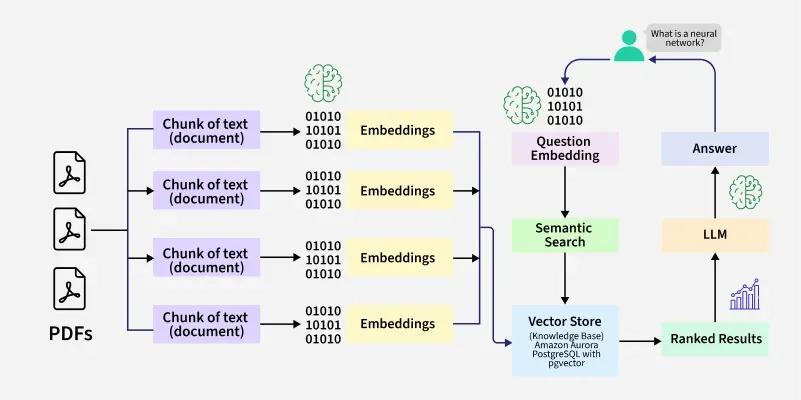



1. **User Query** <br>
The process begins when a user submits a query or request.<br>
    _For example, a user might ask, “What’s the weather like today?” This query serves as the input to the LangChain pipeline._

2. **Vector Representation and Similarity Search** <br>
    - Once the query is received, LangChain converts it into a vector representation using embeddings. This vector captures the semantic meaning of the query.
    - The vector is then used to perform a similarity search in a vector database. The goal is to find the most relevant information or context stored in the database that matches the user's query.

3. **Fetching Relevant Information**
Based on the similarity search, LangChain retrieves the most relevant data or context from the database. This step ensures that the language model has access to accurate and contextually appropriate information to generate a meaningful response.

4. **Generating a Response**
The retrieved information is passed to the language model (e.g., OpenAI's GPT, Anthropic's Claude or others). The LLM processes the input and generates a response or takes an action based on the provided data.<br>
    _For example, if the query is about the weather, the LLM might generate a response like, “Today’s weather is sunny with a high of 75°F.”_<br>
The formatted response is returned to the user as the final output. The user receives a clear, accurate and contextually relevant answer to their query.


## **Step-by-Step Implementation**<br>
Let's implement a model using LangChain and OpenAI API:

**Step 1: Install the dependencies**<br>
We will install all the required dependencies for our model.
* langchain: the core LangChain framework (chains, prompts, tools, memory, etc.).
* langchain-openai: OpenAI model wrapper for LangChain (GPT-3.5, GPT-4, etc.).
* python-dotenv: to securely manage our API keys inside a .env file.

In [ ]:
!pip install langchain langchain-openai python-dotenv

**Step 2: Import Libraries**<br>
We will import all the required libraries.
- os: interact with environment variables.
- load_dotenv: loads .env file values into our environment.
- OpenAI: lets us call OpenAI’s GPT models in LangChain.
- PromptTemplate: define structured prompts with placeholders.
- StrOutputParser: ensures model response is returned as clean string text.

In [3]:
import os
from dotenv import load_dotenv
from langchain_openai import OpenAI
from langchain.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser

**Step 3: Load API Key**<br>
We need to load the OpenAI API Key, but first we create a .env file to store our API key.
```ini
OPENAI_API_KEY = your_openai_api_key_here
```
Now we use the os.getenv() function to securely fetch the API key.

In [4]:
load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")


**Step 4: Initialize the OpenAI LLM**<br>
We initialize the LLM model:
- temperature=0.7: controls creativity (0 = deterministic, 1 = very creative).
- openai_api_key=api_key: authenticates with OpenAI.

In [5]:
llm = OpenAI(
    temperature=0.7,
    openai_api_key=api_key
)

**Step 5: Run a Simple Prompt**<br>
We will check by running a simple prompt.
- .invoke(): sends prompt to LLM and returns text output.


In [6]:
prompt = "Suggest me a skill that is in demand?"
response = llm.invoke(prompt)
print(" Suggested Skill:\n", response)

 Suggested Skill:
 

Digital marketing is a skill that is in high demand currently. With more and more businesses moving online, the demand for professionals who can effectively market products and services through digital channels is increasing. This includes skills such as social media marketing, content creation, email marketing, search engine optimization (SEO), and pay-per-click (PPC) advertising. Having a strong understanding and experience in digital marketing can make you a valuable asset to any company or brand. It is also a constantly evolving field, making it a valuable skill to continuously learn and develop.



**Step 6: Create a Prompt Template**<br>
We create a dynamic prompt where {year} can be replaced with input values.

In [7]:
template = "Give me 3 career skills that are in high demand in {year}."
prompt_template = PromptTemplate.from_template(template)


**Step 7: Build a Chain with LCEL**<br>
LCEL (LangChain Expression Language): It’s a new way to compose LLM workflows using a simple, chainable syntax with the | (pipe) operator.
- prompt_template
    - Fills placeholders (like {year}) with actual inputs.
    - Example: "Give me 3 career skills in 2025."
- llm
    - Sends the formatted prompt to the OpenAI model.
    - Example input: "Give me 3 career skills in 2025."
    - Example output: "1. Data Analytics\n2. AI/ML\n3. Cybersecurity"
- StrOutputParser()
    - Cleans up and ensures the LLM’s response is returned as a string.

In [ ]:
chain = prompt_template | llm | StrOutputParser()

**Step 8: Run the Chain**<br>
We run the chain to fetch results.
- .invoke({"year": "2025"}) replaces {year} with 2025 in the prompt.
- Final formatted prompt: "Give me 3 career skills that are in high demand in 2025."

In [ ]:
response = chain.invoke({"year": "2025"})
print("\n Career Skills in 2025:\n", response)


## Applications of LangChain

Let's see the applications of LangChain,
* Chatbots and Virtual Assistants: They can be designed to remember past interactions, connect with external APIs and deliver more natural, context-aware conversations.
* Document Question Answering: Users can query PDFs, research papers, contracts or enterprise documentation and get precise answers instead of manually searching.
* Knowledge Management Systems: They help organize and retrieve company knowledge by linking LLMs with structured and unstructured data, enabling intelligent search, summarization and recommendations.
* Workflow Automation: Complex multi-step processes like customer support ticket resolution, report generation or CRM updates can be automated seamlessly.
* Data Analysis and Business Intelligence (BI): Natural language queries can be translated into SQL, turning raw data into insights, charts or business reports with minimal effort.<br>

The LangChain framework is a great interface to develop interesting AI-powered applications and from personal assistants to prompt management as well as automating tasks. So, keep learning and keep developing powerful applications.